# Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters

In [3]:
g_0 = 0.99
kappa = 0.15
eps = 5
n = 5000 # number of points in the detuning axis

The cubic equation in terms of $N_0$ is:

$$
N_0^3 - \frac{\Delta}{\chi^2 } N_0^2 + N_0\left(\frac{\kappa^2 + \Delta^2}{4\chi^4 }\right) - \frac{\varepsilon^2}{4\chi^4 } = 0
$$

The above equation will cause problem if we put, $\chi = 0$, therefore its better to use the equation below:

$$
\chi^4 N_0^3 - \Delta\chi^2 N_0^2 + N_0\left(\frac{\kappa^2 + \Delta^2}{4}\right) - \frac{\varepsilon^2}{4} = 0
$$

where, $N_0 = |c_s|^2$

In the code, $\chi$ is replaced by $g_0$

# Main code

Using equation:

$$
\chi^4 N_0^3 - \Delta\chi^2 N_0^2 + N_0\left(\frac{\kappa^2 + \Delta^2}{4}\right) - \frac{\varepsilon^2}{4} = 0
$$

In [4]:
# define an empty array to store the roots of the cubic polynomial
cubic_roots = [[0]*3 for i in range(n)]

# define an array to store the values of detunings
detuning = np.linspace(-20, 20, n)

for index, delta in enumerate(detuning):
    a = g_0**4
    b = -delta*g_0**3
    c = (kappa**2 + delta**2)/4
    d = -eps**2/4
    coeff = [a, b, c, d]
    cubic_roots[index] = np.roots(coeff)

# Collect only the real roots

In [5]:
real_roots = [[0]*3 for i in range(n)]
for index, roots in enumerate(cubic_roots):
    if roots[0].imag == 0.0:
        real_roots[index][0] = roots[0].real
    if roots[1].imag == 0.0:
        real_roots[index][1] = roots[1].real
    if roots[2].imag == 0.0:
        real_roots[index][2] = roots[2].real


In [6]:
third_root = [0 for i in range(n)]
second_root = [0 for i in range(n)]
first_root = [0 for i in range(n)]

for index, roots in enumerate(real_roots):
    third_root[index] = roots[2]
    second_root[index] = roots[1]
    first_root[index] = roots[0]

# Convert the lists to arrays

In [7]:
third_root = np.array(third_root).astype(np.float32)
second_root = np.array(second_root).astype(np.float32)
first_root = np.array(first_root).astype(np.float32)

The reason for converting the the above arrays to float is because we want to replace the elements with value 0 by nan. And its not allowed to convert integer zero to nan

# Remove datapoints which are zero

In [8]:
y1 = first_root.copy()
y1[first_root == 0.0] = np.nan      # replacing the points which are zero with nan
y2 = second_root.copy()
y2[second_root == 0.0] = np.nan      # replacing the points which are zero with nan
y3 = third_root.copy()
y3[third_root == 0.0] = np.nan      # replacing the points which are zero with nan

# Plotting

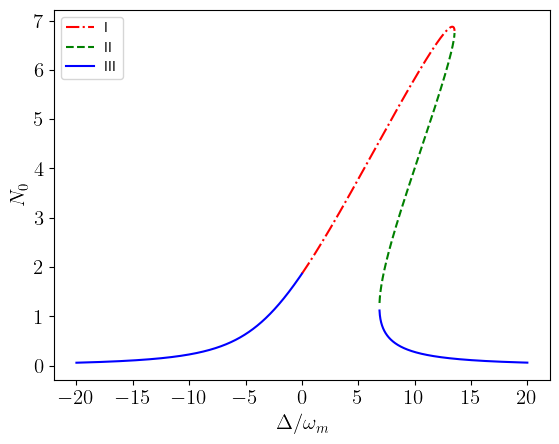

In [9]:
plt.rcParams['text.usetex'] = True    # command for using LateX text in figures


plt.plot(detuning, y1, 'r-.')
plt.plot(detuning, y2, 'g--')
plt.plot(detuning, y3, 'b-')

# Legends
plt.legend(["I", "II", "III"], loc="upper left")

# axis labels
plt.xlabel(r'$\Delta/\omega_m$',  fontsize = 15)
plt.ylabel(r'$N_0$',  fontsize = 15)

# axis ticks
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15) 

# save the plot to a file
plt.savefig('figure4.png')

plt.show()
